<a href="https://colab.research.google.com/github/Debora-Simoes/IA901-2023S1/blob/main/projetos/Reconhecimento_acao_humana_imagem_drone/notebooks/Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas e montando o Drive

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil
from scipy import ndimage
from scipy.ndimage import convolve

In [ ]:
# Montando o drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Funções para filtragem:

Funções definidas para filtragem no domínio espacial dos dados originais (imagens RBG):

- Filtro de Sobel
- Filtro de Laplace
- Filtro de Prewitt

In [ ]:
# Filtro de Sobel

# Definindo a função "MagSobel"
# Parâmetro da função: img - imagem a ser filtrada (array)

def MagSobel(img):
  img = np.asarray(img).astype('float32') # Convertendo os elementos do array para float
  Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]) # Filtro de Sobel vertical
  Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) # Filtro de Sobel horizontal
  fv = ndimage.convolve(img, Sv) # Imagem fitrada pelo Filtro de Sobel vertical c
  fh = ndimage.convolve(img, Sh) # Imagem fitrada pelo Filtro de Sobel horizontal
  Magnitude_Sobel = (fh**2 + fv**2)**0.5 # Magnitude Sobel: MagSobel = √(fh^2 +fv^2)
  return Magnitude_Sobel

In [ ]:
# Filtro de Laplace

# Definindo a função "Laplace"
# Parâmetro da função: img - imagem a ser filtrada (array)

def Laplace(img):
  img = np.asarray(img).astype('float32') # Convertendo os elementos do array para float
  laplace = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]) # Filtro Laplaciano (Gonzales e Woods, 2009)
  img_laplace = ndimage.convolve(img, laplace) # Imagem fitrada pelo Filtro Laplaciano
  return img_laplace

In [ ]:
# Filtro de Prewitt

# Definindo a função "MagPrewitt"
# Parâmetro da função: img - imagem a ser filtrada (array)

def MagPrewitt(img):
  img = np.asarray(img).astype('float32') # Convertendo os elementos do array para float
  Pv = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # Filtro de Prewitt vertical (Gonzales; Woods, 2009)
  Ph = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) # Filtro de Prewitt horizontal (Gonzales; Woods, 2009)
  fv = ndimage.convolve(img, Pv) # Imagem fitrada pelo Filtro de Prewitt vertical
  fh = ndimage.convolve(img, Ph) # Imagem fitrada pelo Filtro de Prewitt horizontal
  Magnitude_Prewitt = (fh**2 + fv**2)**0.5 # Magnitude Prewitt: MagPrewitt = √(fh^2 +fv^2)
  return Magnitude_Prewitt

###Pré-processamento dos dados de Treino

In [ ]:
# Dados de treino

path = "gdrive/MyDrive/IA901_Projeto/Dados_filtrados/train/images/" # diretório onde estão salvas as imagens do conjunto de treinamento
list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_filtrados/train/images")

#path = "gdrive/MyDrive/IA901_Projeto/Dados_balanceados/train/images/"
#list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_balanceados/train/images")

#path_saida_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC/train/images' # diretório onde serão salvas as imagens em níveis de cinza
path_saida_NC_augmentation = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_augmentation/train/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_NC_balanceado = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/train/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/train/images' # diretório onde serão salvas as imagens resultantes do Filtro de Sobel
#path_saida_laplace = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Laplaciano/train/images' # diretório onde serão salvas as imagens resultantes do Filtro Laplaciano
#path_saida_prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/train/images' # diretório onde serão salvas as imagens resultantes do Filtro de Prewitt

In [ ]:
for i, file in enumerate(list_files):

  #  CONVERSÃO PARA N.C.
  img_nc = Image.open(path+file).convert("L") # Lê a imagem e converte para n.c.
  img_nc.save(os.path.join(path_saida_NC, file))

  img_array = np.asarray(img_nc) # Salvando a imagem como array

  # APLICANDO O FILTRO DE SOBEL
  sobel = np.asarray(MagSobel(img_array), np.uint8) # Aplicando o filtro de Sobel
  img_sobel = Image.fromarray(sobel) # Transformando o array numpy para imagem PIL
  img_sobel.save(os.path.join(path_saida_sobel, file))

  # APLICANDO O FILTRO DE LAPLACE
  laplace = np.asarray(Laplace(img_array), np.uint8) # Aplicando o filtro Laplaciano
  img_laplace = Image.fromarray(laplace) # Transformando o array numpy para imagem PIL
  img_laplace.save(os.path.join(path_saida_laplace, file))

  # APLICANDO O FILTRO DE PREWITT
  prewitt = np.asarray(MagPrewitt(img_array), np.uint8) # Aplicando o filtro de Prewitt
  img_prewitt = Image.fromarray(prewitt) # Transformando o array numpy para imagem PIL
  img_prewitt.save(os.path.join(path_saida_prewitt, file))

###Pré-processamento dos dados de Validação

In [ ]:
# Dados de validação

path = "gdrive/MyDrive/IA901_Projeto/Dados_filtrados/val/images/" # diretório onde estão salvas as imagens do conjunto de validação
list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_filtrados/val/images")

#path = "gdrive/MyDrive/IA901_Projeto/Dados_balanceados/val/images/"
#list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_balanceados/val/images")

#path_saida_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC/val/images' # diretório onde serão salvas as imagens em níveis de cinza
path_saida_NC_augmentation = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_augmentation/val/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_NC_balanceado = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/val/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/val/images' # diretório onde serão salvas as imagens resultantes do Filtro de Sobel
#path_saida_laplace = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Laplaciano/val/images' # diretório onde serão salvas as imagens resultantes do Filtro Laplaciano
#path_saida_prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/val/images' # diretório onde serão salvas as imagens resultantes do Filtro de Prewitt

In [ ]:
for i, file in enumerate(list_files):

  #  CONVERSÃO PARA N.C.
  img_nc = Image.open(path+file).convert("L") # Lê a imagem e converte para n.c.
  img_nc.save(os.path.join(path_saida_NC, file))

  img_array = np.asarray(img_nc) # Salvando a imagem como array

  # APLICANDO O FILTRO DE SOBEL
  sobel = np.asarray(MagSobel(img_array), np.uint8) # Aplicando o filtro de Sobel
  img_sobel = Image.fromarray(sobel) # Transformando o array numpy para imagem PIL
  img_sobel.save(os.path.join(path_saida_sobel, file))

  # APLICANDO O FILTRO DE LAPLACE
  laplace = np.asarray(Laplace(img_array), np.uint8) # Aplicando o filtro Laplaciano
  img_laplace = Image.fromarray(laplace) # Transformando o array numpy para imagem PIL
  img_laplace.save(os.path.join(path_saida_laplace, file))

  # APLICANDO O FILTRO DE PREWITT
  prewitt = np.asarray(MagPrewitt(img_array), np.uint8) # Aplicando o filtro de Prewitt
  img_prewitt = Image.fromarray(prewitt) # Transformando o array numpy para imagem PIL
  img_prewitt.save(os.path.join(path_saida_prewitt, file))

###Pré-processamento dos dados de Teste

In [ ]:
# Dados de teste

path = "gdrive/MyDrive/IA901_Projeto/Dados_filtrados/Teste/images/" # diretório onde estão salvas as imagens do conjunto de teste
list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_filtrados/Teste/images")

#path = "gdrive/MyDrive/IA901_Projeto/Dados_balanceados/test/images/"
#list_files = os.listdir("gdrive/MyDrive/IA901_Projeto/Dados_balanceados/test/images")

#path_saida_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/test/images' # diretório onde serão salvas as imagens em níveis de cinza
path_saida_NC_augmentation = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_augmentation/test/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_NC_balanceado = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/test/images' # diretório onde serão salvas as imagens em níveis de cinza
#path_saida_sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/Teste/images' # diretório onde serão salvas as imagens resultantes do Filtro de Sobel
#path_saida_laplace = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Laplaciano/Teste/images' # diretório onde serão salvas as imagens resultantes do Filtro Laplaciano
#path_saida_prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/Teste/images' # diretório onde serão salvas as imagens resultantes do Filtro de Prewitt

In [ ]:
for i, file in enumerate(list_files):

  #  CONVERSÃO PARA N.C.
  img_nc = Image.open(path+file).convert("L") # Lê a imagem e converte para n.c.
  img_nc.save(os.path.join(path_saida_NC, file))

  img_array = np.asarray(img_nc) # Salvando a imagem como array

  # APLICANDO O FILTRO DE SOBEL
  sobel = np.asarray(MagSobel(img_array), np.uint8) # Aplicando o filtro de Sobel
  img_sobel = Image.fromarray(sobel) # Transformando o array numpy para imagem PIL
  img_sobel.save(os.path.join(path_saida_sobel, file))

  # APLICANDO O FILTRO DE LAPLACE
  laplace = np.asarray(Laplace(img_array), np.uint8) # Aplicando o filtro Laplaciano
  img_laplace = Image.fromarray(laplace) # Transformando o array numpy para imagem PIL
  img_laplace.save(os.path.join(path_saida_laplace, file))

  # APLICANDO O FILTRO DE PREWITT
  prewitt = np.asarray(MagPrewitt(img_array), np.uint8) # Aplicando o filtro de Prewitt
  img_prewitt = Image.fromarray(prewitt) # Transformando o array numpy para imagem PIL
  img_prewitt.save(os.path.join(path_saida_prewitt, file))

### Visualizando o resultado após os processamentos

In [ ]:
# Imagem de exemplo pertencente ao conjunto de TREINO: "Drone_005.mp4_t-103.5.jpg"

name_img = 'Drone_005.mp4_t-103.5.jpg'

Imagem original (RGB):

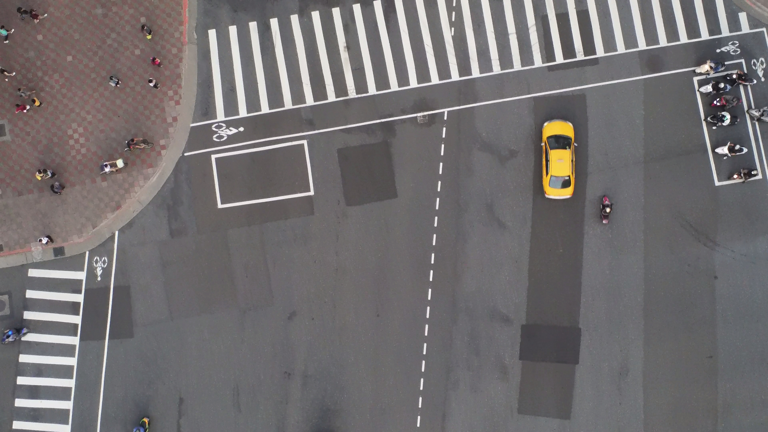

In [ ]:
img_file = "/content/gdrive/MyDrive/IA901_Projeto/Dados_filtrados/train/images/"+name_img # Diretório em que se encontra a imagem original

img = Image.open(img_file) # abrindo a imagem
img = img.resize((img.width//5, img.height//5)) # Redimensionando a imagem para melhor visualização
display(img)

Imagem em níveis de cinza:

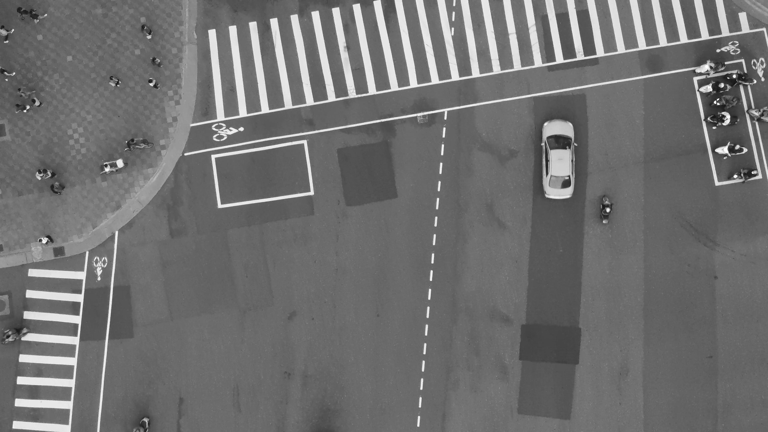

In [ ]:
img_file = "/content/gdrive/MyDrive/IA901_Projeto/Dados_pre_processing/NC/train/images/"+name_img # Diretório em que se encontra a imagem em níveis de cinza

img = Image.open(img_file) # abrindo a imagem
img = img.resize((img.width//5, img.height//5)) # Redimensionando a imagem para melhor visualização
display(img)

Imagem após a filtragem de Sobel:

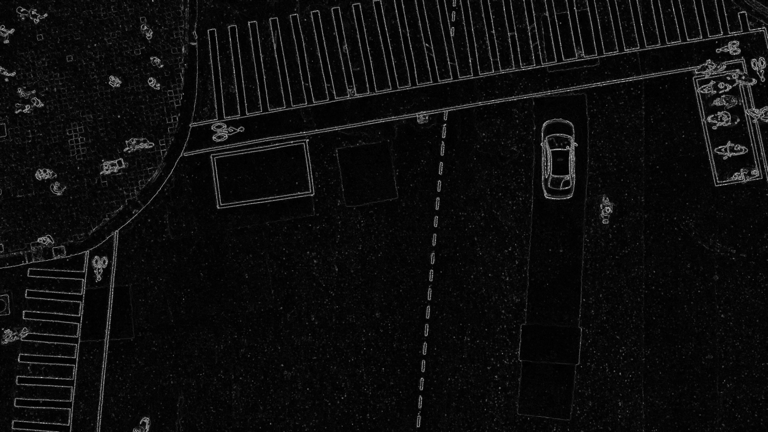

In [ ]:
img_file = "/content/gdrive/MyDrive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/train/images/"+name_img # Diretório em que se encontra a imagem após a Filtragem de Sobel

img = Image.open(img_file) # abrindo a imagem
img = img.resize((img.width//5, img.height//5)) # Redimensionando a imagem para melhor visualização
display(img)

Imagem após a filtragem de Laplace:

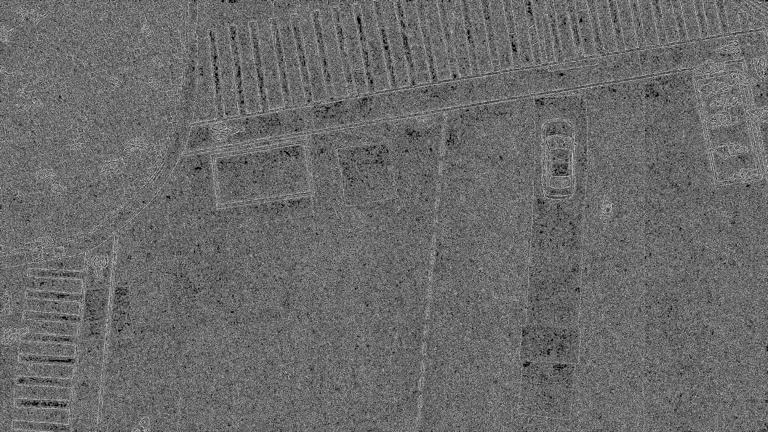

In [ ]:
img_file = "/content/gdrive/MyDrive/IA901_Projeto/Dados_pre_processing/Filtro_Laplaciano/train/images/"+name_img # Diretório em que se encontra a imagem após a Filtragem de Laplace

img = Image.open(img_file) # abrindo a imagem
img = img.resize((img.width//5, img.height//5)) # Redimensionando a imagem para melhor visualização
display(img)

Imagem após a filtragem de Prewitt:

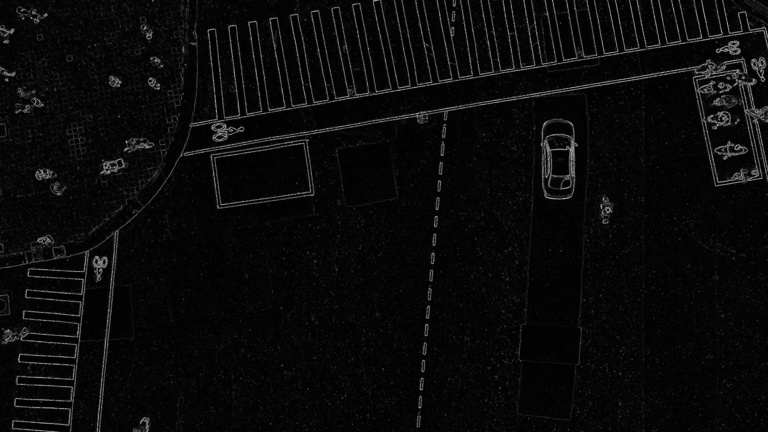

In [ ]:
img_file = "/content/gdrive/MyDrive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/train/images/"+name_img # Diretório em que se encontra a imagem após a Filtragem de Prewitt

img = Image.open(img_file) # abrindo a imagem
img = img.resize((img.width//5, img.height//5)) # Redimensionando a imagem para melhor visualização
display(img)

### Copiando os arquivos de labels

Cada imagem tem que ter um .txt correspondente ao arquivo de labels da referida imagem. Assim, copiou-se o arquivo de treino gerado a partir do processamento do notebook "Creating labels from folders" para a pasta com os arquivos de treino das imagens em níveis de cinza.

In [ ]:
# Labels de treino - Dados filtrados

src_dir = '/content/gdrive/My Drive/IA901_Projeto/Dados_filtrados/train/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC/train/labels' # diretório de saída
dest_dir_Sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/train/labels' # diretório de saída
dest_dir_Prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/train/labels' # diretório de saída
dest_dir_augmentation = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_augmentation/train/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)
shutil.copytree(src_dir, dest_dir_Sobel)
shutil.copytree(src_dir, dest_dir_Prewitt)
shutil.copytree(src_dir, dest_dir_augmentation)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/train/labels'

In [ ]:
# Labels de treino - Dados balanceados

src_dir = '/content/gdrive/MyDrive/IA901_Projeto/Dados_balanceados/train/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/train/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/train/labels'

In [ ]:
# Labels de validação - Dados filtrados

src_dir = '/content/gdrive/My Drive/IA901_Projeto/Dados_filtrados/val/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC/val/labels' # diretório de saída
dest_dir_Sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/val/labels' # diretório de saída
dest_dir_Prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/val/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)
shutil.copytree(src_dir, dest_dir_Sobel)
shutil.copytree(src_dir, dest_dir_Prewitt)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/val/labels'

In [ ]:
# Labels de validação - Dados balanceados

src_dir = '/content/gdrive/MyDrive/IA901_Projeto/Dados_balanceados/val/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/val/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/val/labels'

In [ ]:
# Labels de teste

src_dir = '/content/gdrive/My Drive/IA901_Projeto/Dados_filtrados/Teste/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC/Teste/labels' # diretório de saída
dest_dir_Sobel = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Sobel/Teste/labels' # diretório de saída
dest_dir_Prewitt = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/Teste/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)
shutil.copytree(src_dir, dest_dir_Sobel)
shutil.copytree(src_dir, dest_dir_Prewitt)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/Filtro_Prewitt/Teste/labels'

In [ ]:
# Labels de teste - Dados balanceados

src_dir = '/content/gdrive/MyDrive/IA901_Projeto/Dados_balanceados/test/labels' # diretório de origem
dest_dir_NC = '/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/test/labels' # diretório de saída

shutil.copytree(src_dir, dest_dir_NC)

'/content/gdrive/My Drive/IA901_Projeto/Dados_pre_processing/NC_balanceado/test/labels'

### Verificando se todas as imagens RBG (originais) foram pré-processadas

In [ ]:
%cd /content/gdrive/MyDrive/IA901_Projeto/Dados_pre_processing/

/content/gdrive/.shortcut-targets-by-id/1r9oHXQ5JU33TQMJZYU2USd04KCn98S1_/IA901_Projeto/Dados_pre_processing


In [ ]:
# Caminho para os dados pré-processados (pasta onde tem o treino/val/test)

DATA_DIR = "NC" # Nesse caso, mostra a quantidade de imagens em níveis de cinza (o mesmo pode ser feito para os outros processamentos, apenas comentando essa linha e retirando o comentário da linha correspondente à pasta desejada)
# DATA_DIR = "Filtro_Sobel"
# DATA_DIR = "Filtro_Laplaciano"
# DATA_DIR = "Filtro_Prewitt"
# DATA_DIR = "NC_balanceado"
# DATA_DIR = "NC_augmentation"

In [ ]:
os.listdir(DATA_DIR)

lens = {}

for split in os.listdir(DATA_DIR):
  lens[split] = len(os.listdir(DATA_DIR + '/' + split + '/images/'))
  print(f'Na pasta de {split} temos {lens[split]} imagens.')

/content/gdrive/.shortcut-targets-by-id/1r9oHXQ5JU33TQMJZYU2USd04KCn98S1_/IA901_Projeto/Dados_pre_processing
Na pasta de train temos 1407 imagens.
Na pasta de test temos 1266 imagens.
Na pasta de val temos 348 imagens.
